# Clustering

## 1. Loading and Preprocessing


In [4]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris(as_frame=True)
df = iris.frame.copy()  
df = df.rename(columns={'target': 'species'})

# Drop species for clustering
X = df.drop(columns=['species']).copy()

print("Data shape:", X.shape)
X.head()


Data shape: (150, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## 2. KMeans Clustering

**Working**

KMeans partitions observations into *k* clusters by initializing *k* centroids and iteratively performing two steps until convergence:
1. assign each point to the nearest centroid (usually Euclidean distance).
2. recompute centroids as the mean of all points assigned to each cluster.

This repeats until assignments no longer change or the centroid movements fall below a threshold.

**KMeans is suitable because**
- Iris features are numeric and roughly continuous, which fits KMeans' Euclidean-distance assumption.
- The dataset is low-dimensional and often exhibits spherical-ish clusters for the species, which KMeans detects well.
- It's fast and commonly used as a baseline clustering algorithm.


c:\Users\arjun\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Score (KMeans, k=3): 0.5512


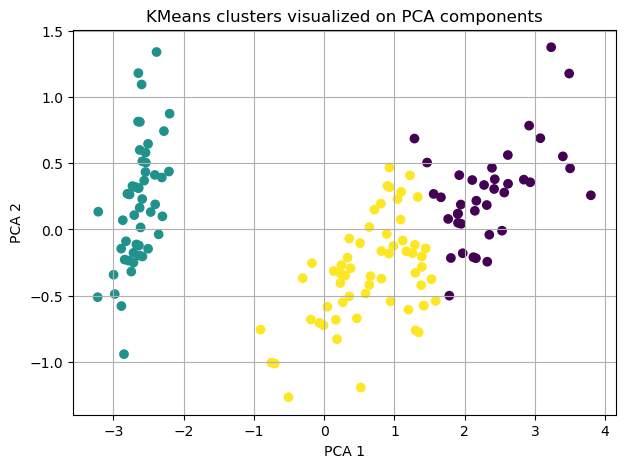

In [5]:
# KMeans implementation and visualization
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Choose k=3 because Iris has three species (we don't use species during clustering)
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
labels_kmeans = kmeans.fit_predict(X)

# Evaluate with silhouette score (higher is better; range -1..1)
sil_score = silhouette_score(X, labels_kmeans)
print(f"Silhouette Score (KMeans, k={k}): {sil_score:.4f}")

# Visualize clusters using PCA to 2 dimensions
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(7,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_kmeans)
plt.title('KMeans clusters visualized on PCA components')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.show()


## 3. Hierarchical Clustering 

**How Hierarchical clustering works (brief):**

Hierarchical clustering creates a tree (dendrogram) of clusters. There are two approaches:
- **Agglomerative (bottom-up):** each point starts as its own cluster; iteratively merge the closest pair of clusters until one cluster remains.
- **Divisive (top-down):** start with all points in a single cluster and split recursively.

Linkage criteria (single, complete, average, ward) determine how distance between clusters is computed.

**Why Hierarchical may be suitable for Iris:**
- It does not require specifying the number of clusters upfront (you can cut the dendrogram at a desired level).
- The dendrogram can reveal the cluster structure at multiple resolutions — useful for exploratory analysis on Iris.


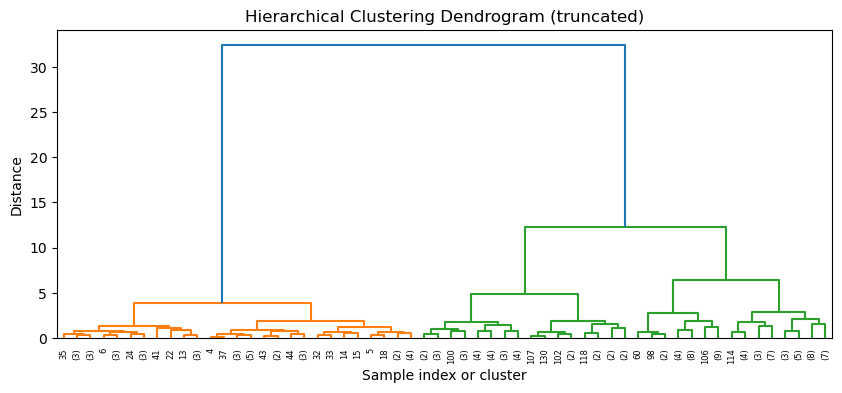

Silhouette Score (Agglomerative, n_clusters=3): 0.5543


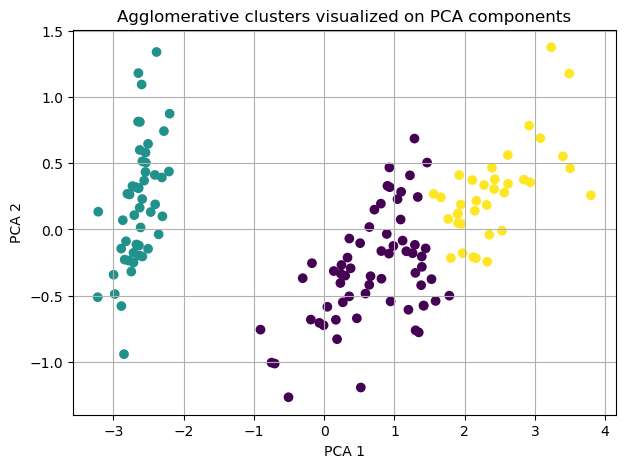

In [6]:
# Hierarchical (Agglomerative) clustering and dendrogram
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Compute linkage matrix for dendrogram (Ward linkage is common for Euclidean data)
Z = linkage(X, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 4))
dendrogram(Z, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('Sample index or cluster')
plt.ylabel('Distance')
plt.show()

# Fit agglomerative clustering with 3 clusters for direct comparison
agg = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels_agg = agg.fit_predict(X)

# Silhouette score
sil_score_agg = silhouette_score(X, labels_agg)
print(f"Silhouette Score (Agglomerative, n_clusters=3): {sil_score_agg:.4f}")

# Visualize clusters using PCA to 2 dimensions
plt.figure(figsize=(7,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_agg)
plt.title('Agglomerative clusters visualized on PCA components')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.show()


## 4. Conclusion

- Both KMeans and Hierarchical clustering produce reasonable clusterings on the Iris dataset.



